In [1]:
import os, sys 
sys.path.append('../../gempy/')

In [2]:
import gempy as gp

In [3]:
# Import improved plotting features
from gempy.plot import visualization_2d_pro as vv
from gempy.plot import vista

Active grids: ['regular']
Active grids: ['regular' 'topography']


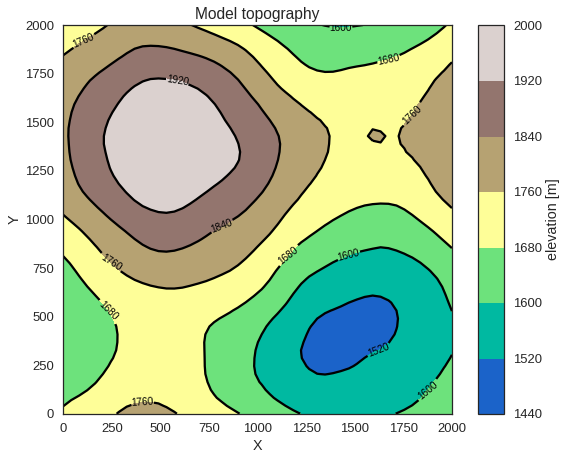

In [4]:
data_path= '../../gempy/notebooks/'
geo_model = gp.create_model('test_topo')

gp.init_data(geo_model, [0,2000.,0,2000.,0,2000.],[50,50,50], 
      path_o = data_path+"/data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = data_path+"/data/input_data/tut_chapter1/simple_fault_model_points.csv", default_values=True)
geo_model.set_topography(source='random',fd=1, d_z=np.array([1500,2000]));

In [5]:
# set 3 sections which go North South
section_dict = {'section_SW-NE':([250,250],[1750,1750],[100,100]),
                 'section_NW-SE':([250,1750],[1750,250],[100,100])} 
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
section_SW-NE,"[250, 250]","[1750, 1750]","[100, 100]",2121.320344
section_NW-SE,"[250, 1750]","[1750, 250]","[100, 100]",2121.320344


In [6]:
gp.map_series_to_surfaces(geo_model,
                          {"Fault_Series":'Main_Fault', 
                             "Strat_Series": ('Sandstone_2','Siltstone',
                                              'Shale', 'Sandstone_1', 'basement')}, remove_unused_series=True);

In [7]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


In [8]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])
sol = gp.compute_model(geo_model, compute_mesh=True, sort_surfaces=False)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                  values
range            3464.1
$C_o$            285714
drift equations  [3, 3]


../../gempy/gempy/core/solution.py:288: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [9]:
sec_name = 'section_SW-NE'

In [10]:
p1 = geo_model.grid.sections.df.loc[sec_name, 'start']
p2 = geo_model.grid.sections.df.loc[sec_name, 'stop']

res = geo_model.grid.regular_grid.resolution[0]

In [11]:
p = gp._plot.plot_2d(geo_model, show_data=False)
test_slice = gp._plot.Plot2D._slice_topo_4_sections(p, p1, p2, res)

<Figure size 748.8x514.8 with 0 Axes>

In [12]:
a = p.add_section(sec_name)
p.plot_lith(a, sec_name)
p.plot_topography(a, sec_name)

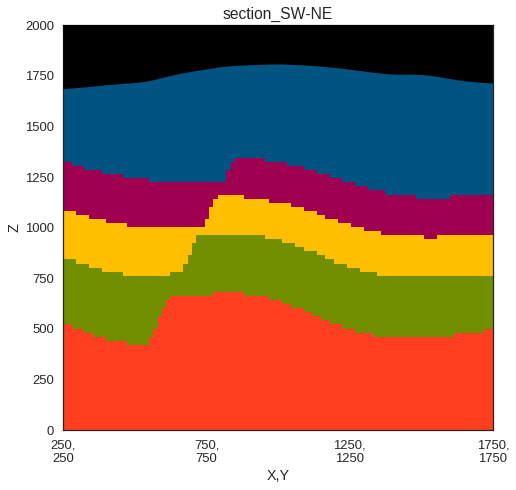

In [13]:
p.fig

In [14]:
xy = geo_model.grid.sections.calculate_line_coordinates_2points(p1, p2, res)

In [15]:
from scipy import interpolate

In [16]:
val3d = geo_model.grid.topography.values_3D

In [40]:
def interpolate_zvals_at_xy(values_3D, xy):
    assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
                                        '(fix soon)'
    assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
                                        '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2].T

    f = interpolate.RectBivariateSpline(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

def interpolate_zvals_at_xy_no_assert(values_3D, xy):
   # assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
   #                                     '(fix soon)'
   # assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
   #                                     '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2].T

    f = interpolate.RectBivariateSpline(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

def interpolate_zvals_at_xy_nw_se(values_3D, xy):
    #assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    #assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2]
    f = interpolate.interp2d(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.flipud(zi).diagonal() #np.diag(zi)

def interpolate_zvals_at_xy_new(values_3D, xy):
    #assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    #assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2]
    f = interpolate.interp2d(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

In [18]:
old_version = interpolate_zvals_at_xy(val3d, xy)

In [19]:
new_version = interpolate_zvals_at_xy_new(val3d, xy)

In [20]:
new_version - old_version

array([ 0.18831274,  0.17779933,  0.27742862,  0.03950043,  0.11509927,
       -0.13431303,  0.11807746,  0.0446222 ,  0.15242158,  0.44894526,
        0.31368177, -0.01971529, -0.04112761, -0.12911075, -0.10339203,
       -0.10035035,  0.00107845,  0.05909758, -0.33675928, -0.32701829,
       -0.05895568, -0.15072626, -0.12708121,  0.02160388, -0.07851047,
       -0.09138003,  0.00120824, -0.07493887, -0.0662417 , -0.03849416,
       -0.08426763, -0.15795544, -0.13120406, -0.00157012, -0.08556134,
        0.07280818,  0.10019897,  0.10562948,  0.25946309, -0.11018193,
       -0.22371887, -0.20968637, -0.11683705, -0.24357753,  0.00881635,
        0.02607675,  0.02771943,  0.05719915,  0.21533125,  0.03740333])

In [28]:
sec2_name = 'section_NW-SE'

In [29]:
p1 = geo_model.grid.sections.df.loc[sec2_name, 'start']
p2 = geo_model.grid.sections.df.loc[sec2_name, 'stop']

res = geo_model.grid.regular_grid.resolution[0]

In [30]:
xy = geo_model.grid.sections.calculate_line_coordinates_2points(p1, p2, res)

In [31]:
val3d = geo_model.grid.topography.values_3D

In [41]:
old_version2 = interpolate_zvals_at_xy_no_assert(val3d, xy)

ValueError: Error code returned by bispev: 10

In [33]:
new_version2 = interpolate_zvals_at_xy_nw_se(val3d, xy)

In [34]:
new_version2

array([1850.23418667, 1871.57233804, 1893.06928284, 1914.01356569,
       1933.3401413 , 1951.25264078, 1967.05611733, 1979.80378962,
       1987.50269407, 1991.32601722, 1992.20228983, 1989.59036949,
       1983.72555283, 1974.86802828, 1966.14703764, 1957.53480172,
       1948.24460723, 1937.3487304 , 1924.36167135, 1909.50786109,
       1893.40011529, 1875.0069583 , 1855.10930008, 1834.98640253,
       1814.72197404, 1794.72137362, 1774.20403228, 1753.17192964,
       1730.28898042, 1704.85156677, 1678.9748309 , 1654.50390707,
       1631.73653839, 1610.4709787 , 1591.79052282, 1574.05709206,
       1556.93147847, 1541.36728704, 1528.03112163, 1515.6282649 ,
       1505.9169519 , 1500.82448758, 1501.66256864, 1505.38046449,
       1510.80744522, 1517.00817457, 1524.25238829, 1532.48260469,
       1541.46468652, 1551.15147406])

In [35]:
new_version

array([1683.17866807, 1686.4051149 , 1689.62790236, 1693.31500362,
       1697.91561856, 1702.23802755, 1705.64771968, 1708.91878926,
       1712.01628672, 1716.94087954, 1724.38092494, 1734.31320835,
       1745.05503282, 1754.48953319, 1763.07857102, 1770.74154995,
       1777.20947775, 1784.16554217, 1790.75450802, 1795.24756833,
       1798.10770741, 1800.13403981, 1801.80939358, 1803.24849598,
       1804.49796499, 1804.41583945, 1802.76019755, 1800.78383127,
       1798.33671954, 1795.3495094 , 1791.29047729, 1786.98397182,
       1782.35678118, 1777.03526941, 1771.37448853, 1765.76404578,
       1760.77931819, 1756.21035676, 1754.06579965, 1753.98711409,
       1753.63766051, 1752.15651167, 1747.68429172, 1741.02483464,
       1733.59532832, 1726.74965537, 1720.90282258, 1716.60918768,
       1713.30810707, 1711.02525398])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

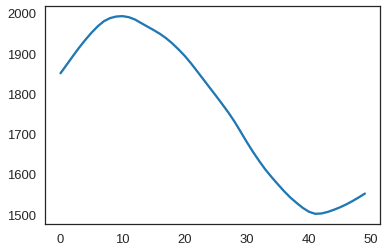

In [37]:
plt.plot(new_version2)

23.964550570676693


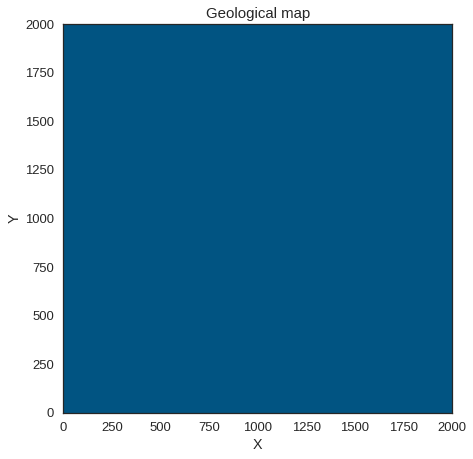

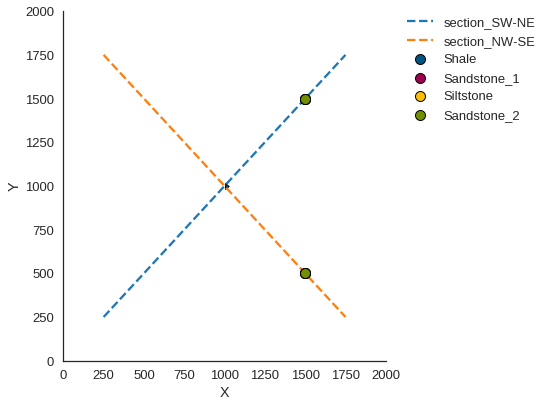

In [58]:
gp.plot.plot_section_traces(geo_model)